In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Intro to Data Structures

In [4]:
s = pd.Series(np.random.randn(5), index=["a","b","c","d","e"])
s

a    1.067047
b   -0.540739
c   -0.699756
d   -2.093642
e   -1.129694
dtype: float64

In [5]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [6]:
type(s.index)

pandas.core.indexes.base.Index

If no index is passed, 0 to len(data) -1 will be passed as indeces

In [7]:
pd.Series(np.random.randn(5))

0   -0.455272
1    0.490063
2   -1.262356
3    0.907995
4    0.222936
dtype: float64

In [8]:
mydict =  {"b": 1, "a": 0, "c": 2}

pd.Series(mydict)

b    1
a    0
c    2
dtype: int64

In [9]:
pd.Series(mydict, index=["a","c","d","b"])

a    0.0
c    2.0
d    NaN
b    1.0
dtype: float64

If data is a scalar value, an index must be provided. The value will be repated to match the length of the index

In [10]:
pd.Series(5, index=["a", "b", "c", "d"])

a    5
b    5
c    5
d    5
dtype: int64

In [11]:
s

a    1.067047
b   -0.540739
c   -0.699756
d   -2.093642
e   -1.129694
dtype: float64

In [12]:
s[:3]

a    1.067047
b   -0.540739
c   -0.699756
dtype: float64

In [13]:
s[s>s.median()]

a    1.067047
b   -0.540739
dtype: float64

In [14]:
s

a    1.067047
b   -0.540739
c   -0.699756
d   -2.093642
e   -1.129694
dtype: float64

In [16]:
s[[4,3,1]]

e   -1.129694
d   -2.093642
b   -0.540739
dtype: float64

In [17]:
np.exp(s)

a    2.906782
b    0.582318
c    0.496706
d    0.123237
e    0.323132
dtype: float64

In [18]:
s.array

<PandasArray>
[ 1.0670467879323706, -0.5407390289015018, -0.6997564596734805,
  -2.093642052830006,  -1.129693792712253]
Length: 5, dtype: float64

Series is ndarray like

In [19]:
s.values

array([ 1.06704679, -0.54073903, -0.69975646, -2.09364205, -1.12969379])

In [20]:
s.to_numpy()

array([ 1.06704679, -0.54073903, -0.69975646, -2.09364205, -1.12969379])

In [21]:
s["a"]

1.0670467879323706

In [22]:
s

a    1.067047
b   -0.540739
c   -0.699756
d   -2.093642
e   -1.129694
dtype: float64

In [23]:
"e" in s

True

In [24]:
# If label is not contained, an exception will be thrown

s["f"]

KeyError: 'f'

In [28]:
s.get("f", "default")

'default'

In [29]:
# When working with numpy array, we do not use value by value. (Vectorization). Same is true with pandas

t = s+s
t

a    2.134094
b   -1.081478
c   -1.399513
d   -4.187284
e   -2.259388
dtype: float64

In [30]:
s*2

a    2.134094
b   -1.081478
c   -1.399513
d   -4.187284
e   -2.259388
dtype: float64

In [31]:
s**2

a    1.138589
b    0.292399
c    0.489659
d    4.383337
e    1.276208
dtype: float64

In [32]:
s[1:] + s[:-1]

a         NaN
b   -1.081478
c   -1.399513
d   -4.187284
e         NaN
dtype: float64

**name attribute**

In [34]:
# Series can also have a name attribute:

s = pd.Series(np.random.randn(5), name="arr")

In [35]:
s

0   -1.039822
1    1.442637
2   -1.313941
3   -0.232913
4   -0.584287
Name: arr, dtype: float64

Note that s2 and s are different because their names are different

In [36]:
s2 = s.rename("arr2")

In [37]:
s2

0   -1.039822
1    1.442637
2   -1.313941
3   -0.232913
4   -0.584287
Name: arr2, dtype: float64

In [41]:
s2["0"] = 4.7

In [42]:
s

0   -1.039822
1    1.442637
2   -1.313941
3   -0.232913
4   -0.584287
Name: arr, dtype: float64

In [43]:
s2

0   -1.039822
1    1.442637
2   -1.313941
3   -0.232913
4   -0.584287
a    4.700000
0    4.700000
Name: arr2, dtype: float64

<h3>Create from the dictionary</h3>

In [52]:
d = {
    "one": pd.Series([1.0,2.0,3.0], index=["a","b","c"]),
    "two": pd.Series([4.0,5.0,6.0, 7.0], index=["a","b","c","d"])
}

In [47]:
df =pd.DataFrame(d)
df

,one,two
a,1.0,4.0
b,2.0,5.0
c,3.0,6.0
d,NaN,7.0


In [49]:
pd.DataFrame(d, index=["d","b","a"], columns=["two","three"])

,two,three
d,7.0,NaN
b,5.0,NaN
a,4.0,NaN


<h4>Column Selection and Deletion</h4>

In [53]:
df

,one,two
a,1.0,4.0
b,2.0,5.0
c,3.0,6.0
d,NaN,7.0


In [54]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [55]:
df["three"] = df["one"] * df["two"]

In [56]:
df

,one,two,three
a,1.0,4.0,4.0
b,2.0,5.0,10.0
c,3.0,6.0,18.0
d,NaN,7.0,NaN


In [57]:
# Columns can be deleted as well
del df["one"]

In [58]:
df

,two,three
a,4.0,4.0
b,5.0,10.0
c,6.0,18.0
d,7.0,NaN


In [59]:
three = df.pop("three")

In [60]:
three

a     4.0
b    10.0
c    18.0
d     NaN
Name: three, dtype: float64

In [61]:
df

,two
a,4.0
b,5.0
c,6.0
d,7.0


In [62]:
df["foo"] = "bar" #Scalar values are repeated across

In [63]:
df

,two,foo
a,4.0,bar
b,5.0,bar
c,6.0,bar
d,7.0,bar


In [66]:
df.insert(1, "middle", df["two"] * df["two"])

In [67]:
df

,two,middle,foo
a,4.0,16.0,bar
b,5.0,25.0,bar
c,6.0,36.0,bar
d,7.0,49.0,bar


Assigning new columns in method chains

In [69]:
iris = pd.read_csv("data/iris.data")

In [70]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
iris.assign(sepal_ratio=iris["SepalWidth"]/iris["SepalLength"]).head()
# You can assign new column that potentially derived from existing columns (Not mutate the original data)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [76]:
iris.assign(petal_ratio = lambda x: x["PetalWidth"]/x["PetalLength"]).head() # lambda function as you can see work with dfs well

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,petal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.142857
1,4.9,3.0,1.4,0.2,Iris-setosa,0.142857
2,4.7,3.2,1.3,0.2,Iris-setosa,0.153846
3,4.6,3.1,1.5,0.2,Iris-setosa,0.133333
4,5.0,3.6,1.4,0.2,Iris-setosa,0.142857


Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. **The filtering happens first**, and then the ratio calculations. This is an example where we didn’t have a reference to the filtered DataFrame available.

<AxesSubplot:xlabel='SepalRatio', ylabel='PetalRatio'>

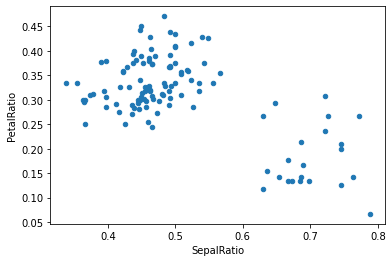

In [77]:
(iris.query("SepalLength > 5").assign(SepalRatio = lambda x: x["SepalWidth"]/x["SepalLength"], PetalRatio = lambda x: x["PetalWidth"]/x["PetalLength"])).plot(kind="scatter", x="SepalRatio", y="PetalRatio")

In [78]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [81]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
# We can also have dependent assignment like below
dfa = dfa.assign(C=lambda x: x.A + x.B, D=lambda x: x.A + x.C)
dfa

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [84]:
df.loc["b"] #Select column
df, df.iloc[2]

(   two  middle  foo
 a  4.0    16.0  bar
 b  5.0    25.0  bar
 c  6.0    36.0  bar
 d  7.0    49.0  bar,
 two        6.0
 middle    36.0
 foo        bar
 Name: c, dtype: object)

### Data Alignment and Arithmetic

In [85]:
dataf = pd.DataFrame(np.random.randn(10,4), columns=["A","B","C","D"])
dataf2 = pd.DataFrame(np.random.randn(7,3), columns=["A","B","C"])
# Only the columns and rows for which data exist on both dataframe will be printed to screen. 
dataf +dataf2

,A,B,C,D
0,0.506622,-0.845484,1.263026,NaN
1,-0.129390,-1.293701,0.027040,NaN
2,0.418005,-1.218091,0.107964,NaN
3,-0.012275,-0.174163,0.410811,NaN
4,1.474735,1.522730,2.124899,NaN
5,1.667178,-0.112793,1.327533,NaN
6,-1.031683,-1.105161,-2.329951,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [87]:
# When doing an operatino between dataframe and series, the default lignment is the rowwise broadcasting of the series on DataFrame columns.

dataf - dataf.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.996418,-1.645781,0.055161,-1.260285
2,0.469829,-1.564749,-0.933185,-0.575123
3,-0.321236,-0.017555,-0.145094,0.584734
4,0.033528,-0.312795,0.158428,-1.027097
5,0.296193,0.591668,-0.459096,-1.197062
6,-0.266388,-1.513395,-2.602120,0.025763
7,-0.056318,-0.603161,-2.498731,-1.222394
8,-0.041679,-0.664720,-0.226273,0.445606
9,2.279477,0.280739,-1.631017,1.083784


In [89]:
# Operations with scalars as just  you would expect

dataf*5 +2

,A,B,C,D
0,1.498018,3.824426,6.420101,2.647809
1,6.480109,-4.404480,6.695907,-3.653615
2,3.847164,-3.999316,1.754175,-0.227807
3,-0.108160,3.736651,5.694629,5.571481
4,1.665656,2.260454,7.212238,-2.487677
5,2.978981,6.782768,4.124620,-3.337499
6,0.166077,-3.742551,-6.590500,2.776623
7,1.216429,0.808620,-6.073557,-3.464162
8,1.289622,0.500826,5.288736,4.875841
9,12.895403,5.228122,-1.734983,8.066729


In [90]:
1 / dataf

,A,B,C,D
0,-9.960515,2.740588,1.131196,7.718327
1,1.116044,-0.780704,1.064757,-0.884390
2,2.706852,-0.833428,-20.339650,-2.244359
3,-2.371736,2.879105,1.353316,1.399979
4,-14.954641,19.197284,0.959281,-1.114162
5,5.107354,1.045420,2.353362,-0.936768
6,-2.726396,-0.870693,-0.582038,6.438131
7,-6.381042,-4.196815,-0.619306,-0.915053
8,-7.038511,-3.335170,1.520341,1.738622
9,0.458909,1.548888,-1.338694,0.824167


In [91]:
dataf ** 4

,A,B,C,D
0,0.000102,0.017727,0.610729,0.000282
1,0.644576,2.691878,0.778033,1.634651
2,0.018627,2.072655,0.000006,0.039412
3,0.031603,0.014554,0.298128,0.260323
4,0.000020,0.000007,1.180910,0.648943
5,0.001470,0.837215,0.032602,1.298588
6,0.018099,1.739961,8.713524,0.000582
7,0.000603,0.003223,6.797976,1.426312
8,0.000407,0.008082,0.187170,0.109441
9,22.547226,0.173748,0.311369,2.167397


In [92]:
# Boolean operators work as well

q1 = pd.DataFrame({"a": [1,0,1], "b": [0,1,1]}, dtype=bool )
q2 = pd.DataFrame({"a": [1,0,0], "b": [1,1,1]}, dtype=bool )

q1&q2, q1 | q2, q1 ^ q2

(       a      b
 0   True  False
 1  False   True
 2  False   True,
        a     b
 0   True  True
 1  False  True
 2   True  True,
        a      b
 0  False   True
 1  False  False
 2   True  False)

Transposing is same as the ndarray transpose

In [93]:
dataf[:5].T

,0,1,2,3,4
A,-0.100396,0.896022,0.369433,-0.421632,-0.066869
B,0.364885,-1.280896,-1.199863,0.347330,0.052091
C,0.884020,0.939181,-0.049165,0.738926,1.042448
D,0.129562,-1.130723,-0.445561,0.714296,-0.897535


In [95]:
# Assuming the data is numeric, numpy ufuncs can be used element-wise on our data

np.exp(dataf)
np.asarray(dataf)

array([[-0.10039642,  0.36488524,  0.8840201 ,  0.12956175],
       [ 0.89602187, -1.28089594,  0.93918137, -1.13072301],
       [ 0.36943283, -1.19986326, -0.04916505, -0.44556149],
       [-0.42163208,  0.34733022,  0.73892587,  0.71429618],
       [-0.06686887,  0.0520907 ,  1.04244761, -0.89753535],
       [ 0.19579611,  0.95655358,  0.42492398, -1.06749984],
       [-0.36678454, -1.1485102 , -1.71810006,  0.15532458],
       [-0.15671421, -0.23827592, -1.61471138, -1.09283249],
       [-0.14207551, -0.29983483,  0.65774714,  0.5751682 ],
       [ 2.17908052,  0.64562437, -0.74699668,  1.21334587]])

Dataframe is not a replacement for ndarray because its indexing and semantics are quite different than ndarray. It just utilizes  the __array__ufunc method of ndarray to be able to work with ufuncs

In [96]:
ser = pd.Series([1,2,3,4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [98]:
ser1 = pd.Series([1,2,3], index=["a","b","c"])
ser2 = pd.Series([1,3,5], index=["b","a","c"])
ser1, ser2, np.remainder(ser1,ser2) # np.remainder (x,y ) (x mod y elementwise)

(a    1
 b    2
 c    3
 dtype: int64,
 b    1
 a    3
 c    5
 dtype: int64,
 a    1
 b    0
 c    3
 dtype: int64)

In [99]:
ser3 = pd.Series([2,4,6], index=["b","c","d"])
ser3

b    2
c    4
d    6
dtype: int64

In [100]:
ser3.b

2

In [101]:
dataf

,A,B,C,D
0,-0.100396,0.364885,0.884020,0.129562
1,0.896022,-1.280896,0.939181,-1.130723
2,0.369433,-1.199863,-0.049165,-0.445561
3,-0.421632,0.347330,0.738926,0.714296
4,-0.066869,0.052091,1.042448,-0.897535
5,0.195796,0.956554,0.424924,-1.067500
6,-0.366785,-1.148510,-1.718100,0.155325
7,-0.156714,-0.238276,-1.614711,-1.092832
8,-0.142076,-0.299835,0.657747,0.575168
9,2.179081,0.645624,-0.746997,1.213346


Dataframes can be accessed via . (dots). Though it must be valid IPython variable name

In [102]:
dataf.A

0   -0.100396
1    0.896022
2    0.369433
3   -0.421632
4   -0.066869
5    0.195796
6   -0.366785
7   -0.156714
8   -0.142076
9    2.179081
Name: A, dtype: float64